Generate a synthetic datasets having four classes and 1000 samples using thefollowing piece of code:
```python
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=1.0)
```
1. Show the scatter plot of the dataset (each class patterns from a different color)
2. Split the dataset into 75% training and 25% testing patterns.
3. Apply standard scaler function to normalize the data as per normal distribution.
4. Apply logistic regression to classify the data into respective classes. Make use of an appropriate function to show the decision boundaries. Also show the classification report and Confusion matrix.
5. Apply nonlinear-SVM to classify the test data into respective classes. Make use of RBF kernel. Plot the decision boundaries. Also show the classification report and Confusion matrix.
6. Apply k-NN to classify the test data into respective classes. Comments on the best suitable value of the parameter “k”.

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=1.0)

##### 1. Show the scatter plot of the dataset (each class patterns from a different color)

C:\Users\saura_p6\AppData\Local\Temp\ipykernel_39144\3844661308.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j, 0], X[y == j, 1],


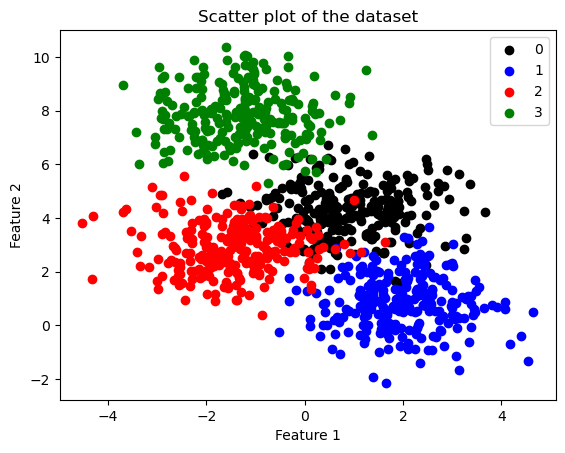

In [32]:
for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                c=ListedColormap(('black', 'blue', 'red', 'green'))(i), label=j)
plt.title('Scatter plot of the dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show();

##### 2. Split the dataset into 75% training and 25% testing patterns.

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

##### 3. Apply standard scaler function to normalize the data as per normal distribution.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

##### 4. Apply logistic regression to classify the data into respective classes. Make use of an appropriate function to show the decision boundaries. Also show the classification report and Confusion matrix.

In [23]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y)
y_pred = logistic_model.predict(test_X)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        61
           1       0.96      0.93      0.95        57
           2       0.90      0.96      0.93        67
           3       0.98      0.95      0.97        65

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[53  2  5  1]
 [ 2 53  2  0]
 [ 3  0 64  0]
 [ 3  0  0 62]]


C:\Users\saura_p6\AppData\Local\Temp\ipykernel_39144\2397548331.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


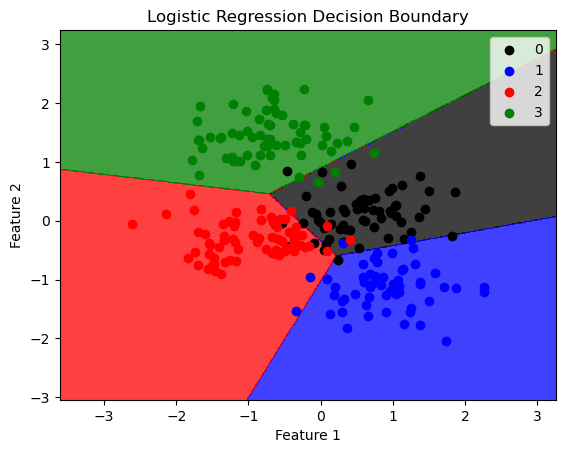

In [28]:
from matplotlib.colors import ListedColormap

X_set, y_set = test_X, test_y
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('black', 'blue', 'red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('black', 'blue', 'red', 'green'))(i), label=j)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show();

#### 5. Apply nonlinear-SVM to classify the test data into respective classes. Make use of RBF kernel. Plot the decision boundaries. Also show the classification report and Confusion matrix.

In [33]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42, C=1000, gamma=0.1)
svm_model.fit(train_X, train_y)
y_pred_svm = svm_model.predict(test_X)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y, y_pred_svm))
print(confusion_matrix(test_y, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.95      0.98      0.97        57
           2       0.91      0.96      0.93        67
           3       0.97      0.95      0.96        65

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[50  3  6  2]
 [ 1 56  0  0]
 [ 3  0 64  0]
 [ 3  0  0 62]]


C:\Users\saura_p6\AppData\Local\Temp\ipykernel_39144\2839028181.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


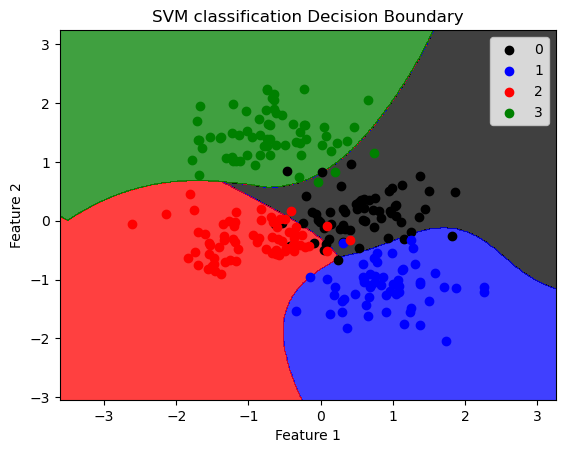

In [36]:
plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('black', 'blue', 'red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('black', 'blue', 'red', 'green'))(i), label=j)
plt.title('SVM classification Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show();

##### 6. Apply k-NN to classify the test data into respective classes. Comments on the best suitable value of the parameter “k”.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

for k in [1, 3, 5, 7, 9, 11, 13, 15]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_X, train_y)
    y_pred_knn = knn_model.predict(test_X)
    print(f'Classification report for k={k}:\n', classification_report(test_y, y_pred_knn))
    print(f'Confusion matrix for k={k}:\n', confusion_matrix(test_y, y_pred_knn))
    print('-' * 50)

Classification report for k=1:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        61
           1       0.96      0.93      0.95        57
           2       0.88      0.94      0.91        67
           3       0.97      0.95      0.96        65

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Confusion matrix for k=1:
 [[51  2  6  2]
 [ 1 53  3  0]
 [ 4  0 63  0]
 [ 3  0  0 62]]
--------------------------------------------------
Classification report for k=3:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.95      0.95      0.95        57
           2       0.91      0.93      0.92        67
           3       0.97      0.95      0.96        65

    accuracy                           0.92       250
   macro avg       0.92      0.92   

k=11 has 93% accuracy